In [1]:
# to access functions from other locations
import sys
sys.path.append('/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/')
# sys.path.append('../')

In [2]:
%matplotlib notebook
import numpy as np 
import matplotlib.pyplot as plt  
from itertools import product
from tqdm.notebook import trange
from time import time, sleep
import functools

from utils.plot_functions import plot_s_animation
from ressim_env import ResSimEnv_v0
from model.ressim import Grid
from utils.env_evaluate_functions import eval_actions

/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/co

# Parameters

In [3]:
seed=1
# case='upperness'
case='tarbert'

In [1]:
# domain properties
nx = 61
ny = 211
lx = 1200*0.3048
ly = 2100*0.3048
grid = Grid(nx=nx, ny=ny, lx=lx, ly=ly)
k = np.loadtxt(f'spe10_data/{case}_perm.csv', delimiter=',') 
phi = np.loadtxt(f'spe10_data/{case}_por.csv', delimiter=',')
s_wir = 0.2
s_oir = 0.2

# fluid properties
mu_w = 3e-4
mu_o = 3e-3
mobility='quadratic'

# time steps
dt = 5
nstep = 20
terminal_step= 20

# initial conditions
pv = 0.2*lx*ly
pvi = pv/(5*20*20)
Q = 795./85  # total injection
fraction = Q/pvi
print(fraction)
q = np.zeros(grid.shape)
q[0,0] = Q
q[-1,-1] = -Q
s = np.ones(grid.shape)*s_wir

NameError: name 'Grid' is not defined

In [5]:
m2_md_conv = 1.01325e+15
k_max, k_min = m2_md_conv*k.max(), m2_md_conv*k.min()
print(f'k_max:{round(k_max)} mD , k_min:{round(k_min)} mD')

k_max:4648.0 mD , k_min:0.0 mD


# Environemnt

In [6]:
# Environments with constant permeability
env = ResSimEnv_v0(grid, np.array([k]), phi, s_wir, s_oir,  # domain properties
                   mu_w, mu_o, mobility,        # fluid properties
                   dt, nstep, terminal_step,    # timesteps
                   q, s) 

# Simulation

cfl: 49.02824992936692
cfl: 49.27272071208295
cfl: 49.288030998851156
cfl: 49.28630119937179
cfl: 49.26552421254767
cfl: 49.247766860804795
cfl: 49.234198948928295
cfl: 49.222995855158636
cfl: 49.213477621408096
cfl: 49.2049802441511
cfl: 49.19704615562763
cfl: 49.189878638420424
cfl: 49.18355417228778
cfl: 49.177901749280636
cfl: 49.17279310658893
cfl: 49.16810214138295
cfl: 49.16379076932585
cfl: 49.159814091950125
cfl: 49.15612686201654
cfl: 49.15268932749526
simulation time: 25 seconds


<IPython.core.display.Javascript object>


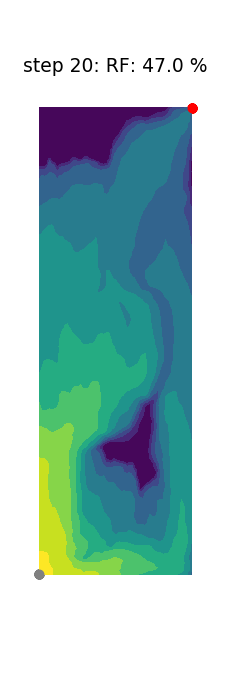

In [7]:
actions_base = np.array([ -q[q<0] for _ in range(terminal_step) ])
actions_base = actions_base.reshape(terminal_step, -1)
before = time()
states, actions, rewards = eval_actions(env, actions_base)
print(f'simulation time: {round(time()-before)} seconds')
fig = plot_s_animation(states, actions, rewards, s_min=0.2, s_max=0.8) # visualization
# fig.show()